In [20]:
# this block contains dependencies for the program

import matplotlib.pyplot as plt
import scipy
import numpy as np
import uncertainties
from uncertainties import unumpy
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams.update({'font.size': 16}) # sets the font size for characteristics figures

In [21]:
# this block contains data collected from online sources

# intensities in mm/h for walnut gulch 
# from https://www.tucson.ars.ag.gov/unit/Publications/PDFfiles/2249.pdf

dvals = [5.*60.,10.*60.,15.*60.,30.*60.,60.*60.] # duration in seconds
#mean of 5 groups
Ivals_2yr = [94,75,63,42.,24.]
Ivals_5yr = [126.,100,84,58,34]
Ivals_10yr = [146,116,99,69,41]
Ivals_25yr = [172,136,117,83,50]
Ivals_50yr = [191,152,130,93,56]
Ivals_100yr = [210,166,143,104,63]

multval = 1./1000./3600.
# convert mm/h to m/s using the conversion factor multval
Ivals_2yr = [I*multval for I in Ivals_2yr]
Ivals_5yr = [I*multval for I in Ivals_5yr]
Ivals_10yr = [I*multval for I in Ivals_10yr]
Ivals_25yr = [I*multval for I in Ivals_25yr]
Ivals_50yr = [I*multval for I in Ivals_50yr]
Ivals_100yr = [I*multval for I in Ivals_100yr]

dvals_wc = dvals

#depths for las reliez from https://www.contracosta.ca.gov/5745/Documents-and-Standards
Dvals_5yr_wc = [0.21,0.3,0.36,0.52,0.74] # depth in inches
Dvals_10yr_wc = [0.24,0.34,0.42,0.6,0.86]
Dvals_25yr_wc = [0.28,0.4,0.49,0.7,1.0]
Dvals_50yr_wc = [0.31,0.44,0.55,0.775,1.1]
Dvals_100yr_wc = [0.34,0.49,0.6,0.875,1.25]



In [22]:
# this block converts depth-duration data to intensity-duration data
# also converts units to m/s

Ivals_5yr_wc = []
Ivals_10yr_wc = []
Ivals_25yr_wc = []
Ivals_50yr_wc = []
Ivals_100yr_wc = []
Dtypes_wc = [Dvals_5yr_wc,Dvals_10yr_wc,Dvals_25yr_wc,Dvals_50yr_wc,Dvals_100yr_wc]
Itypes_wc = [Ivals_5yr_wc,Ivals_10yr_wc,Ivals_25yr_wc,Ivals_50yr_wc,Ivals_100yr_wc]

for i in range(len(Dtypes_wc)):
    for j in range(len(Dtypes_wc[i])):
        Itypes_wc[i] = Itypes_wc[i]+[Dtypes_wc[i][j]*2.54/100./dvals_wc[j]] # intensity in m/s
    print (Itypes_wc[i])

[1.778e-05, 1.27e-05, 1.016e-05, 7.3377777777777775e-06, 5.221111111111111e-06]
[2.0320000000000002e-05, 1.4393333333333333e-05, 1.1853333333333334e-05, 8.466666666666666e-06, 6.067777777777779e-06]
[2.3706666666666668e-05, 1.6933333333333333e-05, 1.3828888888888887e-05, 9.877777777777776e-06, 7.055555555555555e-06]
[2.6246666666666664e-05, 1.8626666666666666e-05, 1.5522222222222226e-05, 1.0936111111111112e-05, 7.761111111111113e-06]
[2.8786666666666667e-05, 2.0743333333333332e-05, 1.6933333333333333e-05, 1.2347222222222224e-05, 8.819444444444445e-06]


Uncertainty
a: 0.00039+/-0.00014
b: -0.47+/-0.06
Uncertainty
a: 0.00049+/-0.00015
b: -0.46+/-0.05
Uncertainty
a: 0.00053+/-0.00016
b: -0.44+/-0.05
Uncertainty
a: 0.00059+/-0.00016
b: -0.43+/-0.04
Uncertainty
a: 0.00064+/-0.00018
b: -0.43+/-0.04
Uncertainty
a: 0.00068+/-0.00018
b: -0.42+/-0.04


Text(0.5, 1.0, 'Walnut Gulch IDF Curves')

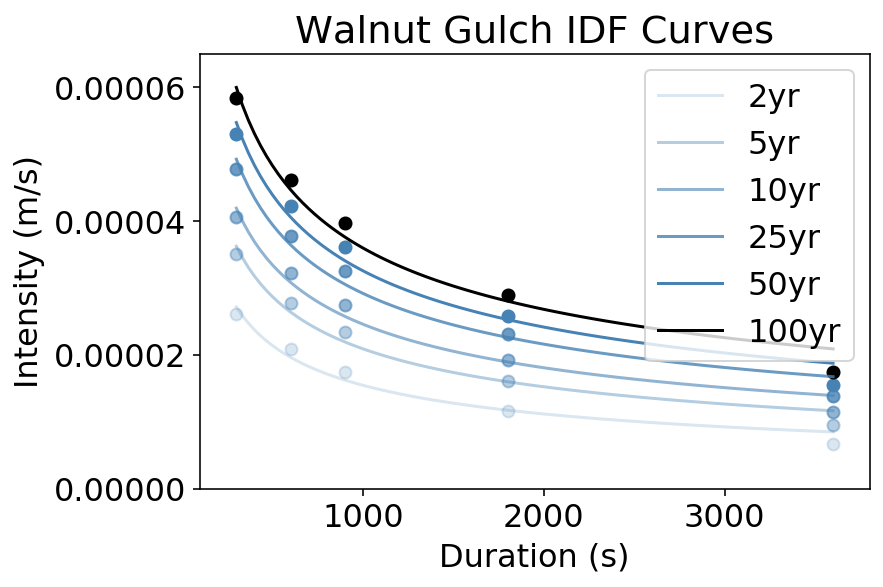

In [23]:
# this block calculates IDF curves for Walnut Gulch

Itypes = [Ivals_2yr,Ivals_5yr,Ivals_10yr,Ivals_25yr,Ivals_50yr,Ivals_100yr]
titles = ['2yr','5yr','10yr','25yr','50yr','100yr']
paramvals = {'2yr':[],'5yr':[],'25yr':[],'50yr':[],'100yr':[]}

def f(x,a,b): # IDF function
    return a*(x)**(b)

alphas = [0.2,0.4,0.6,0.8,1.0,1.0] # opacity values for plotting

for i in range(len(Itypes)):
    
    x = dvals
    y = Itypes[i]
    popt, pcov = scipy.optimize.curve_fit(f, x, y)

    # calculate parameter confidence interval
    a,b = uncertainties.correlated_values(popt, pcov)
    print('Uncertainty')
    print('a: ' + str(a))
    print('b: ' + str(b))


    # calculate regression confidence interval
    px = np.linspace(300,3600., 100)
    plt.ylim(0,0.000065)
    py = a*px**b
    nom = unumpy.nominal_values(py)
    std = unumpy.std_devs(py)
    
    
    #plot the regression with the data
    if i<5:
        colorplot = 'steelblue'
    else:
        colorplot= 'k'
    plt.scatter(dvals,Itypes[i],color = colorplot, alpha = alphas[i]) # data
    plt.plot(px, nom, label=titles[i],color = colorplot, alpha = alphas[i]) # regression
    plt.legend()
    plt.xlabel('Duration (s)')
    plt.ylabel('Intensity (m/s)')
    plt.title(titles[i])
    
plt.title ('Walnut Gulch IDF Curves')


Uncertainty
a: 0.000301+/-0.000011
b: -0.496+/-0.006
Uncertainty
a: 0.000329+/-0.000005
b: -0.4884+/-0.0024
Uncertainty
a: 0.0003846+/-0.0000029
b: -0.4885+/-0.0012
Uncertainty
a: 0.000423+/-0.000011
b: -0.488+/-0.004
Uncertainty
a: 0.000434+/-0.000009
b: -0.4759+/-0.0031


Text(0.5, 1.0, 'Las Reliez Creek IDF Curves')

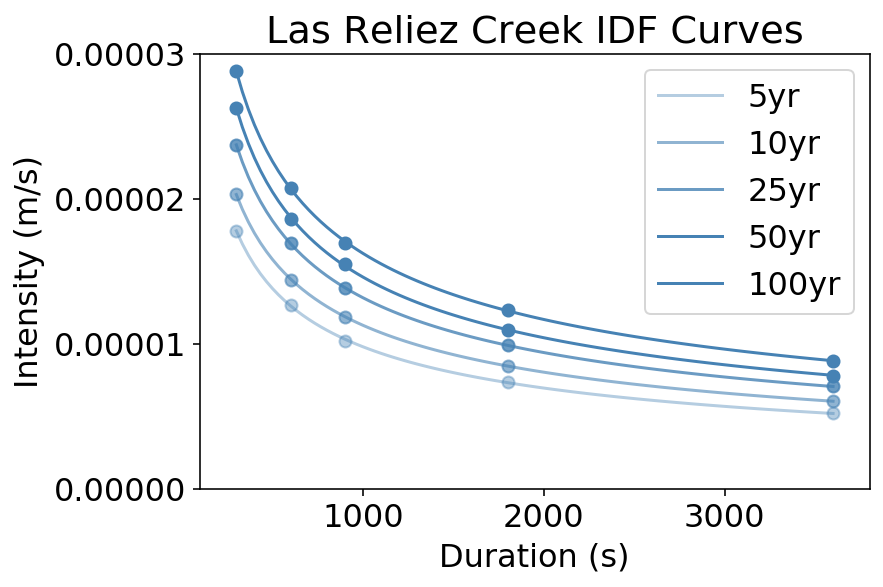

In [26]:
# this block calculates IDF curves for Las Reliez

titles_wc = ['5yr','10yr','25yr','50yr','100yr']
paramvals_wc = {'5yr':[],'25yr':[],'50yr':[],'100yr':[]}

def f(x,a,b): # IDF function
    return a*(x)**(b)
# data from https://www.contracosta.ca.gov/5747/Hydrology-Standards
alphas = [0.4,0.6,0.8,1.0,1.0] # opacity data for plotting


for i in range(len(Itypes_wc)):
    
    x = dvals_wc
    y = Itypes_wc[i]
    popt, pcov = scipy.optimize.curve_fit(f, x, y)
    
    
    # calculate parameter confidence interval
    a,b = uncertainties.correlated_values(popt, pcov)
    print('Uncertainty')
    print('a: ' + str(a))
    print('b: ' + str(b))


    # calculate regression confidence interval
    px = np.linspace(300,3600, 100)
    plt.ylim(0,0.00003)
    py = a*px**b
    nom = unumpy.nominal_values(py)
    std = unumpy.std_devs(py)
    
    #plot the regression with the data
    colorplot = 'steelblue'
    plt.scatter(dvals_wc,Itypes_wc[i],color = colorplot, alpha = alphas[i]) # data
    plt.plot(px, nom, label=titles_wc[i],color = colorplot, alpha = alphas[i]) # regression
    plt.legend()
    plt.xlabel('Duration (s)')
    plt.ylabel('Intensity (m/s)')
    plt.title(titles[i])

plt.title ('Las Reliez Creek IDF Curves')
